In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (12, 10)

Mounted at /content/drive


## Data

In [2]:
path_gdrive = '/content/drive/Shareddrives/DMP-W23/Repo/data/'

In [3]:
df = pd.read_csv(path_gdrive + 'train_imputed.csv')
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_foreign_born,...,med_rent_three_beds,annual_tax_rate,quarter,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,2.3,...,1112.0,6.03,Q3,0,1,0,0,0,1,0
1,1001_2020-08-01,1001,Autauga County,Alabama,2020-08-01,3.174679,1328,2020,8,2.3,...,1105.0,6.07,Q3,0,0,1,0,0,1,0
2,1001_2021-08-01,1001,Autauga County,Alabama,2021-08-01,3.219917,1358,2021,8,2.1,...,1229.0,6.05,Q3,0,0,1,0,0,1,0
3,1001_2022-08-01,1001,Autauga County,Alabama,2022-08-01,3.423852,1455,2022,8,2.3,...,1234.0,6.04,Q3,0,1,0,0,0,1,0
4,1003_2019-08-01,1003,Baldwin County,Alabama,2019-08-01,7.239156,11464,2019,8,3.7,...,1352.0,6.03,Q3,0,1,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 30 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   row_id                                 122265 non-null  object 
 1   cfips                                  122265 non-null  int64  
 2   county                                 122265 non-null  object 
 3   state                                  122265 non-null  object 
 4   first_day_of_month                     122265 non-null  object 
 5   microbusiness_density                  122265 non-null  float64
 6   active                                 122265 non-null  int64  
 7   year                                   122265 non-null  int64  
 8   month                                  122265 non-null  int64  
 9   pct_foreign_born                       122265 non-null  float64
 10  pct_bb                                 122265 non-null  

In [5]:
df.isnull().sum()

row_id                                   0
cfips                                    0
county                                   0
state                                    0
first_day_of_month                       0
microbusiness_density                    0
active                                   0
year                                     0
month                                    0
pct_foreign_born                         0
pct_bb                                   0
median_hh_inc                            0
pct_it_workers                           0
pct_college                              0
earning                                  0
treasury_yield_10yr                      0
monthly_unemp_rate                       0
med_rent_zero_bed                        0
med_rent_one_bed                         0
med_rent_two_beds                        0
med_rent_three_beds                      0
annual_tax_rate                          0
quarter                                  0
holiday_sea

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,cfips,microbusiness_density,active,year,month,pct_foreign_born,pct_bb,median_hh_inc,pct_it_workers,pct_college,...,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile
count,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,...,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000,122265.000000
mean,30376.037640,3.817671,6.442858e+03,2020.692308,6.692308,4.751307,78.764113,56655.061612,1.300656,14.649484,...,904.041402,1198.315589,6.638139,0.076923,0.255175,0.495906,0.248918,0.222353,0.549896,0.227751
std,15143.508721,4.991087,3.304001e+04,0.991089,3.390452,5.704109,8.348129,15208.670136,0.965695,5.771982,...,290.714320,387.201828,3.343423,0.266470,0.435961,0.499985,0.432388,0.415829,0.497506,0.419383
min,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000,0.000000,33.300000,17109.000000,0.000000,0.000000,...,612.000000,763.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000,1.400000,74.300000,46728.000000,0.700000,10.500000,...,729.000000,960.000000,4.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000,2.700000,79.900000,54484.000000,1.200000,13.600000,...,810.000000,1072.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000,5.700000,84.500000,63403.000000,1.700000,17.800000,...,971.000000,1305.000000,7.900000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,56045.000000,284.340030,1.167744e+06,2022.000000,12.000000,54.000000,97.600000,156821.000000,15.200000,45.400000,...,3700.000000,4756.000000,18.280000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.drop(['cfips'], axis=1).corr(method='spearman').style.background_gradient(cmap='coolwarm')

,microbusiness_density,active,year,month,pct_foreign_born,pct_bb,median_hh_inc,pct_it_workers,pct_college,earning,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile
microbusiness_density,1.000000,0.783354,0.014996,0.003281,0.482600,0.643070,0.579875,0.392301,0.702685,0.298438,0.010691,-0.077669,0.589219,0.626630,0.654748,0.665027,0.118559,-0.001626,-0.206792,-0.030305,0.243543,0.020454,-0.182056,0.195689
active,0.783354,1.000000,0.007163,0.000916,0.498257,0.615027,0.484000,0.410579,0.515103,0.254920,0.004782,0.081769,0.592571,0.612303,0.630362,0.628142,0.126717,-0.000880,-0.203773,0.025046,0.176495,-0.037714,-0.145334,0.209801
year,0.014996,0.007163,1.000000,-0.315624,-0.002235,0.100116,0.128154,-0.013287,0.016915,-0.067801,0.535979,-0.214471,0.166405,0.137911,0.150020,0.119371,-0.032243,-0.195744,0.063730,-0.031758,-0.027534,0.034761,-0.029054,0.000000
month,0.003281,0.000916,-0.315624,1.000000,0.000476,-0.051565,-0.040619,0.007182,-0.009633,0.023491,-0.069187,-0.183928,-0.051204,-0.042299,-0.044770,-0.035174,0.009486,0.463240,-0.004216,-0.010319,0.016184,-0.012617,0.010546,0.000000
pct_foreign_born,0.482600,0.498257,-0.002235,0.000476,1.000000,0.432846,0.383609,0.201695,0.407707,0.375806,-0.000153,-0.016869,0.526038,0.526181,0.535006,0.546674,-0.036942,0.000150,-0.264251,-0.016236,0.285209,0.171141,-0.220532,0.091922
pct_bb,0.643070,0.615027,0.100116,-0.051565,0.432846,1.000000,0.755206,0.350569,0.680692,0.282729,-0.049390,-0.122793,0.551630,0.600934,0.635088,0.632286,0.181210,-0.019936,-0.213878,-0.010075,0.227296,0.004724,-0.202594,0.235649
median_hh_inc,0.579875,0.484000,0.128154,-0.040619,0.383609,0.755206,1.000000,0.291323,0.678601,0.345638,0.048311,-0.246876,0.577372,0.632828,0.669934,0.663983,0.206749,-0.022604,-0.249153,-0.038643,0.295895,0.041067,-0.273651,0.283908
pct_it_workers,0.392301,0.410579,-0.013287,0.007182,0.201695,0.350569,0.291323,1.000000,0.357463,0.101653,0.009478,-0.042444,0.284138,0.303988,0.308749,0.307555,0.118649,0.002502,-0.055970,-0.042390,0.105450,-0.077730,-0.013089,0.092598
pct_college,0.702685,0.515103,0.016915,-0.009633,0.407707,0.680692,0.678601,0.357463,1.000000,0.226757,-0.010220,-0.238827,0.499224,0.545951,0.578101,0.581882,0.144750,-0.003750,-0.154091,-0.049192,0.212247,0.039895,-0.191102,0.187144
earning,0.298438,0.254920,-0.067801,0.023491,0.375806,0.282729,0.345638,0.101653,0.226757,1.000000,-0.146317,0.152011,0.362416,0.400945,0.399899,0.406991,0.238337,0.045902,-0.755105,0.010749,0.748916,0.095708,-0.433220,0.419023


In [9]:
df['county'].value_counts()

Washington County        1170
Jefferson County          975
Franklin County           936
Lincoln County            897
Jackson County            897
                         ... 
Aroostook County           39
Androscoggin County        39
Winn Parish                39
West Feliciana Parish      39
Kalawao County             39
Name: county, Length: 1871, dtype: int64

In [10]:
df['state'].value_counts()

Texas                   9906
Georgia                 6201
Virginia                5070
Kentucky                4680
Missouri                4485
Kansas                  4095
Illinois                3978
North Carolina          3900
Iowa                    3861
Tennessee               3705
Nebraska                3588
Indiana                 3588
Ohio                    3432
Minnesota               3393
Michigan                3237
Mississippi             3198
Oklahoma                3003
Arkansas                2925
Wisconsin               2808
Pennsylvania            2613
Alabama                 2613
Florida                 2613
South Dakota            2535
Colorado                2496
Louisiana               2496
New York                2418
California              2262
Montana                 2184
West Virginia           2145
North Dakota            2067
South Carolina          1794
Idaho                   1716
Washington              1521
Oregon                  1404
New Mexico    

<AxesSubplot:xlabel='state', ylabel='microbusiness_density'>

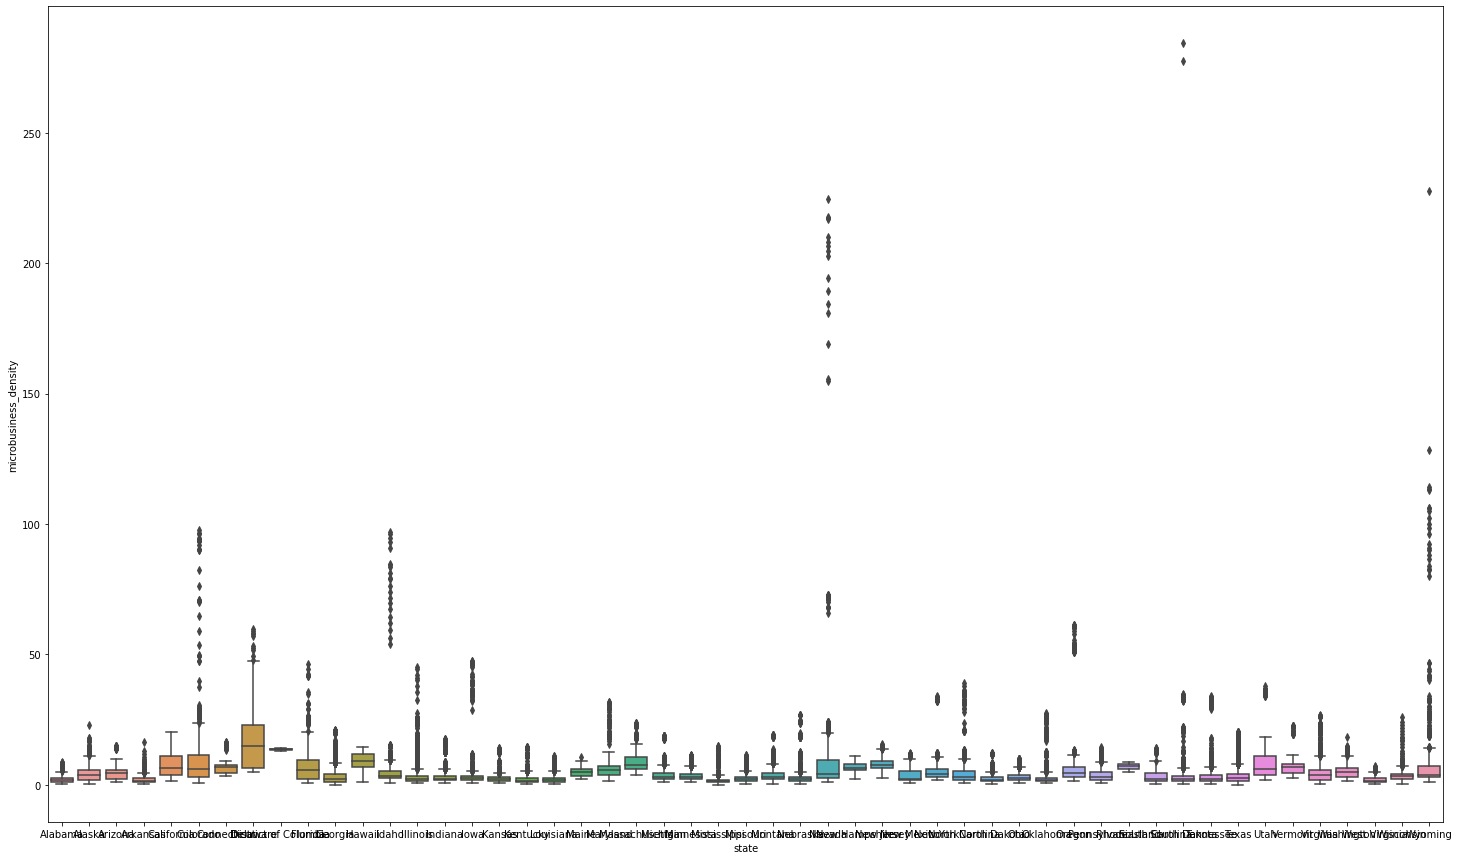

In [11]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="state", y="microbusiness_density")

In [12]:
df['pct_it_workers'].value_counts()

0.9     7254
0.0     6914
1.0     6557
1.1     6375
1.2     6270
        ... 
7.7       12
6.9        5
10.5       5
9.4        5
7.9        5
Name: pct_it_workers, Length: 82, dtype: int64

<AxesSubplot:xlabel='pct_it_workers', ylabel='Density'>

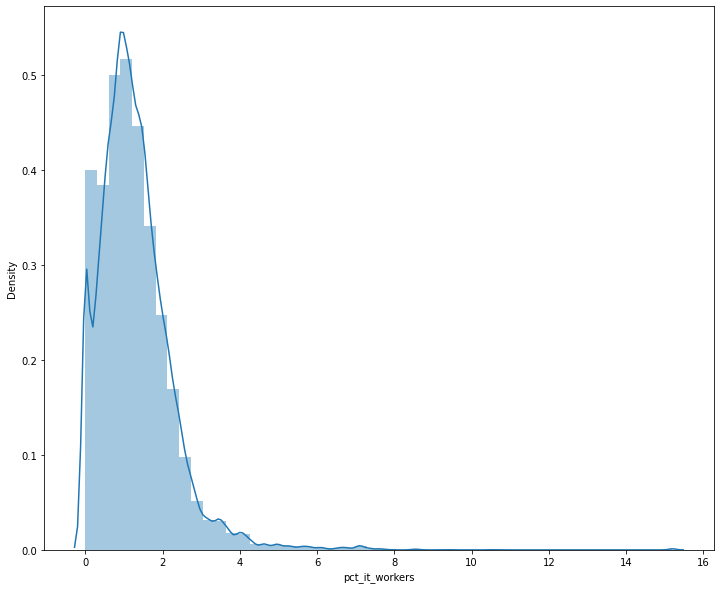

In [13]:
sns.distplot(df['pct_it_workers'])

In [14]:
df['pct_foreign_born'].value_counts()

1.3     3490
1.6     3393
1.5     3103
0.9     3102
1.2     3023
        ... 
39.2       5
25.7       5
20.3       5
47.2       5
15.1       5
Name: pct_foreign_born, Length: 345, dtype: int64

<AxesSubplot:xlabel='pct_foreign_born', ylabel='Density'>

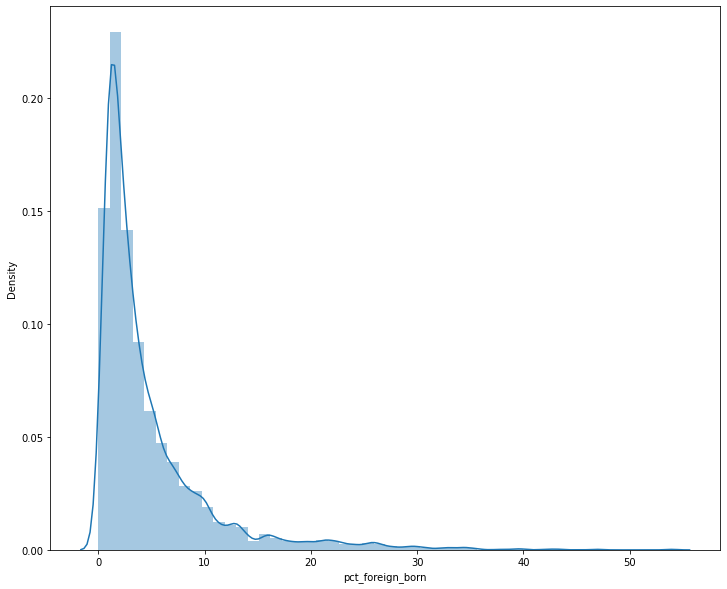

In [15]:
sns.distplot(df['pct_foreign_born'])

In [16]:
df['median_hh_inc'].value_counts()

47500.0    122
54375.0     93
55000.0     88
51250.0     71
59688.0     68
          ... 
40735.0      5
45076.0      5
65679.0      5
53412.0      5
58731.0      5
Name: median_hh_inc, Length: 8374, dtype: int64

<AxesSubplot:xlabel='median_hh_inc', ylabel='Density'>

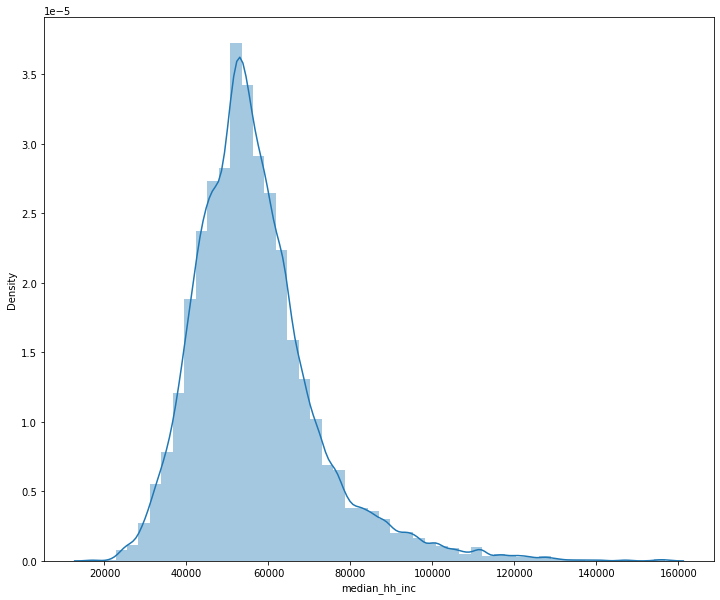

In [17]:
sns.distplot(df['median_hh_inc'])

In [18]:
df['pct_college'].value_counts()

12.6    1239
12.0    1213
11.4    1160
10.0    1144
11.5    1110
        ... 
0.7        5
37.8       5
3.7        5
32.9       5
3.6        5
Name: pct_college, Length: 352, dtype: int64

<AxesSubplot:xlabel='pct_college', ylabel='Density'>

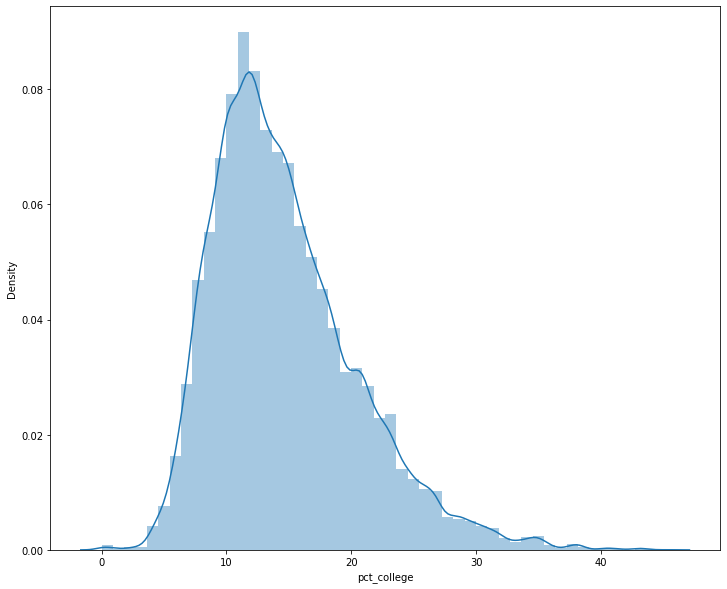

In [19]:
sns.distplot(df['pct_college'])

In [20]:
df['pct_bb'].value_counts()

79.4    896
82.1    864
81.1    861
80.3    799
81.2    788
       ... 
54.7      5
49.6      5
40.2      5
52.5      5
44.0      5
Name: pct_bb, Length: 503, dtype: int64

<AxesSubplot:xlabel='pct_bb', ylabel='Density'>

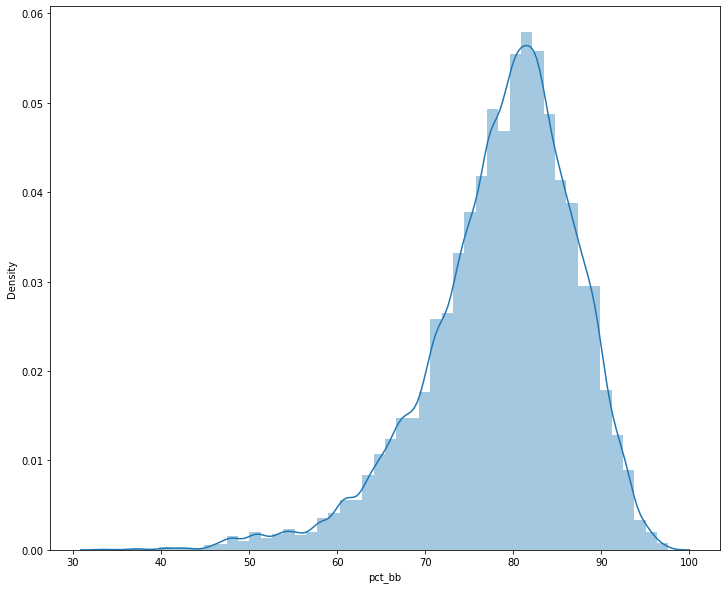

In [21]:
sns.distplot(df['pct_bb'])

In [22]:
df['monthly_unemp_rate'].value_counts()

0.034    3034
0.032    2967
0.035    2922
0.036    2876
0.033    2864
         ... 
0.320       1
0.298       1
0.282       1
0.271       1
3.700       1
Name: monthly_unemp_rate, Length: 334, dtype: int64

<AxesSubplot:xlabel='monthly_unemp_rate', ylabel='Density'>

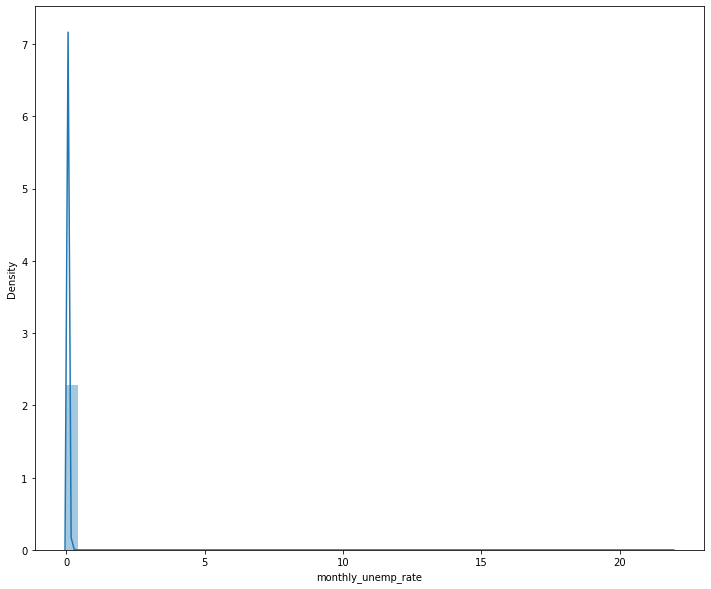

In [23]:
sns.distplot(df['monthly_unemp_rate'])

In [24]:
#divide states into 8 dimensions:
region_map = {
    'Maine': 'New England',
    'Vermont': 'New England',
    'New Hampshire': 'New England',
    'Massachusetts': 'New England',
    'Rhode Island': 'New England',
    'Connecticut': 'New England',
    'New York': 'Mid-Atlantic',
    'New Jersey': 'Mid-Atlantic',
    'Pennsylvania': 'Mid-Atlantic',
    'Maryland': 'Mid-Atlantic',
    'Delaware': 'Mid-Atlantic',
    'Virginia': 'South Atlantic',
    'West Virginia': 'South Atlantic',
    'North Carolina': 'South Atlantic',
    'South Carolina': 'South Atlantic',
    'District of Columbia': 'South Atlantic',
    'Georgia': 'South Atlantic',
    'Florida': 'South Atlantic',
    'Ohio': 'East North Central',
    'Indiana': 'East North Central',
    'Illinois': 'East North Central',
    'Michigan': 'East North Central',
    'Wisconsin': 'East North Central',
    'Minnesota': 'West North Central',
    'Iowa': 'West North Central',
    'Missouri': 'West North Central',
    'North Dakota': 'West North Central',
    'South Dakota': 'West North Central',
    'Nebraska': 'West North Central',
    'Kansas': 'West North Central',
    'Kentucky': 'East South Central',
    'Tennessee': 'East South Central',
    'Mississippi': 'East South Central',
    'Alabama': 'East South Central',
    'Arkansas': 'West South Central',
    'Louisiana': 'West South Central',
    'Oklahoma': 'West South Central',
    'Texas': 'West South Central',
    'Montana': 'Mountain/Pacific',
    'Idaho': 'Mountain/Pacific',
    'Wyoming': 'Mountain/Pacific',
    'Colorado': 'Mountain/Pacific',
    'New Mexico': 'Mountain/Pacific',
    'Arizona': 'Mountain/Pacific',
    'Utah': 'Mountain/Pacific',
    'Nevada': 'Mountain/Pacific',
    'Washington': 'Mountain/Pacific',
    'Oregon': 'Mountain/Pacific',
    'California': 'Mountain/Pacific',
    'Alaska': 'Mountain/Pacific',
    'Hawaii': 'Mountain/Pacific'
}

In [25]:
df['region'] = df['state'].map(region_map)
df['region']

0         East South Central
1         East South Central
2         East South Central
3         East South Central
4         East South Central
                 ...        
122260      Mountain/Pacific
122261      Mountain/Pacific
122262      Mountain/Pacific
122263      Mountain/Pacific
122264      Mountain/Pacific
Name: region, Length: 122265, dtype: object

In [26]:
df['region'].isna().sum()

0

# region and density

<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

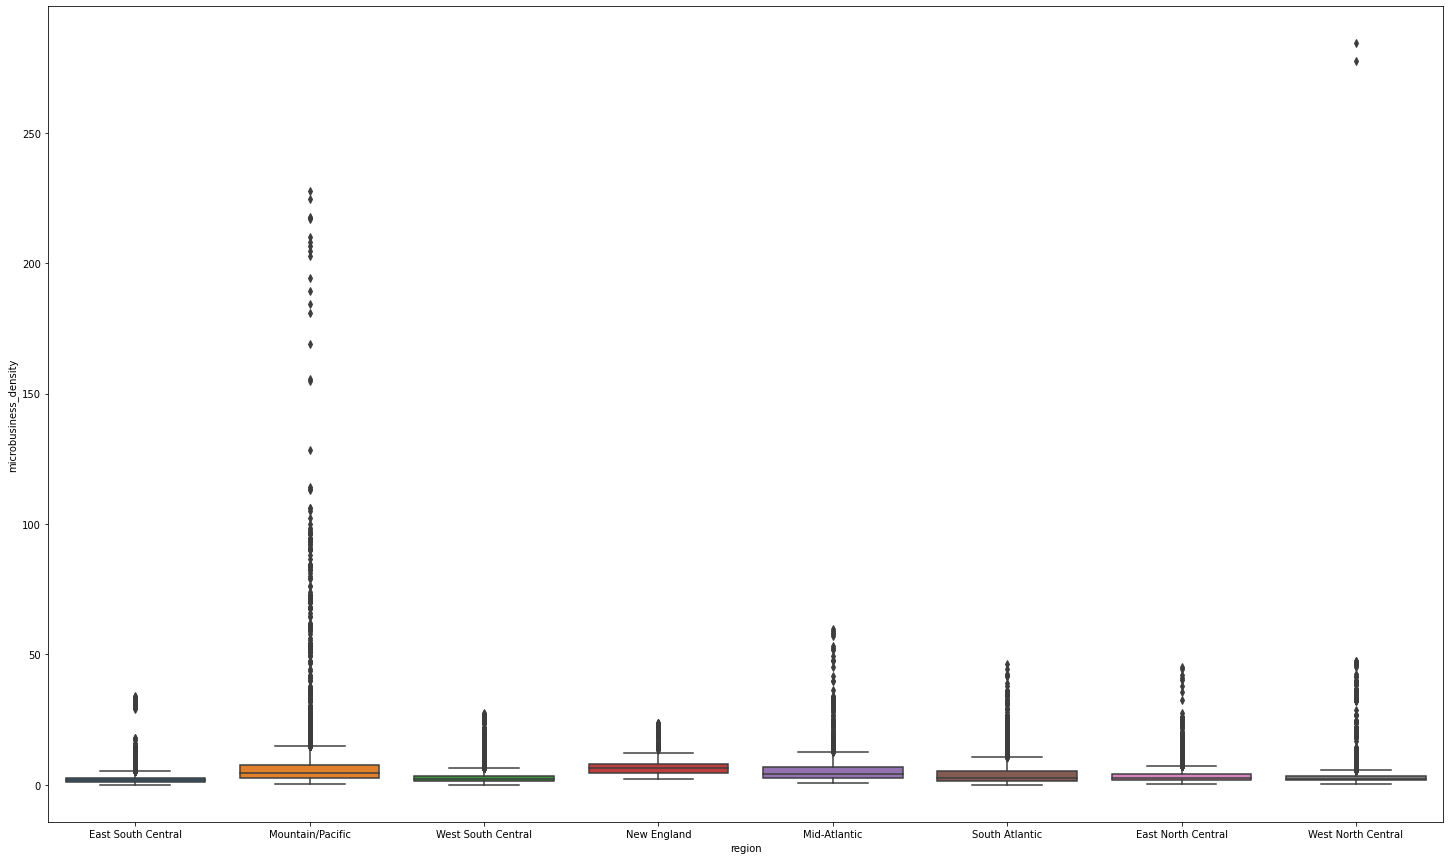

In [27]:
# Box plot
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="microbusiness_density")

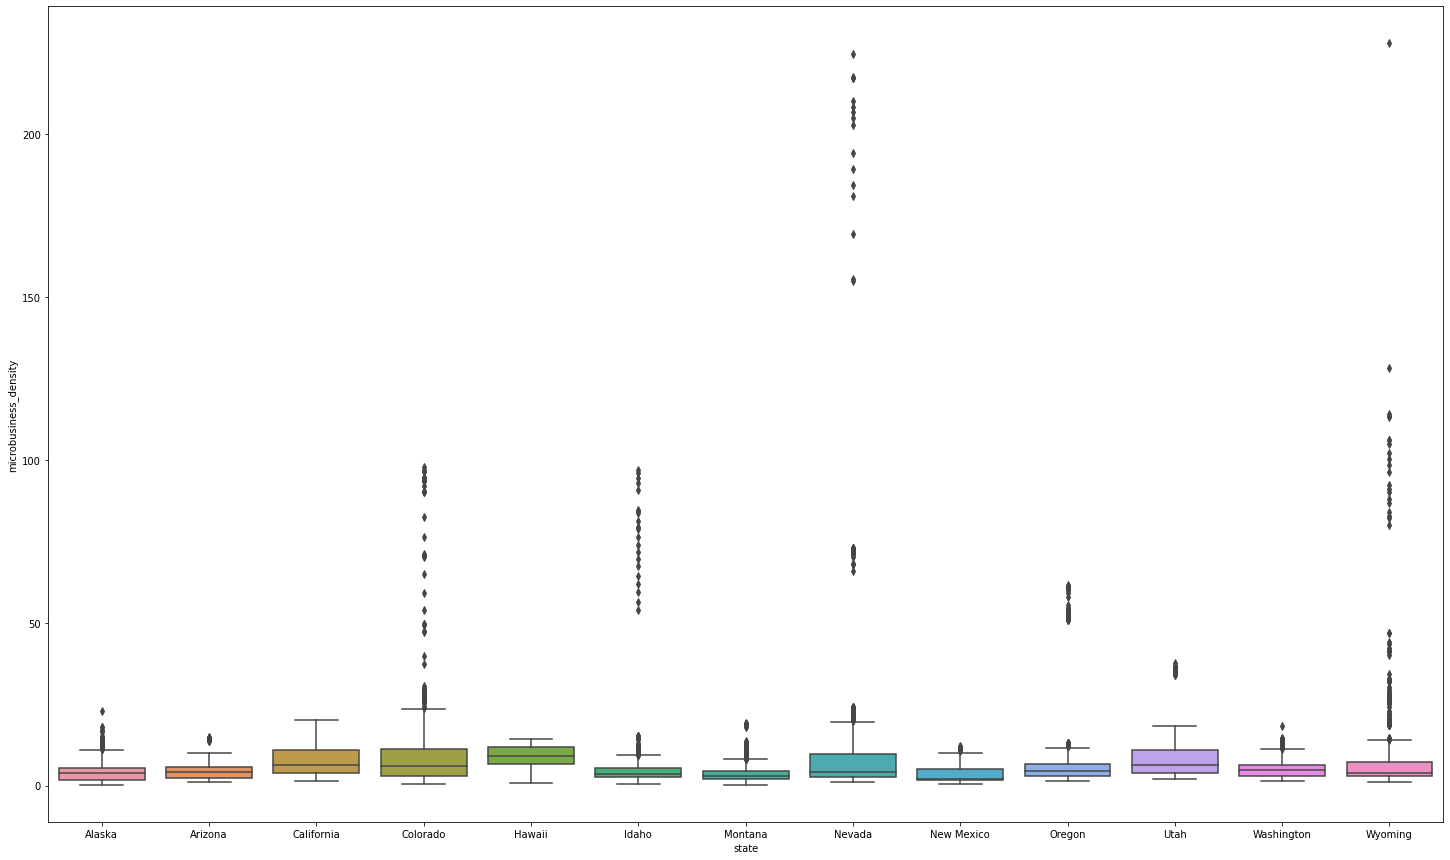

In [28]:
selected_region = 'Mountain/Pacific'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="microbusiness_density")
plt.show()

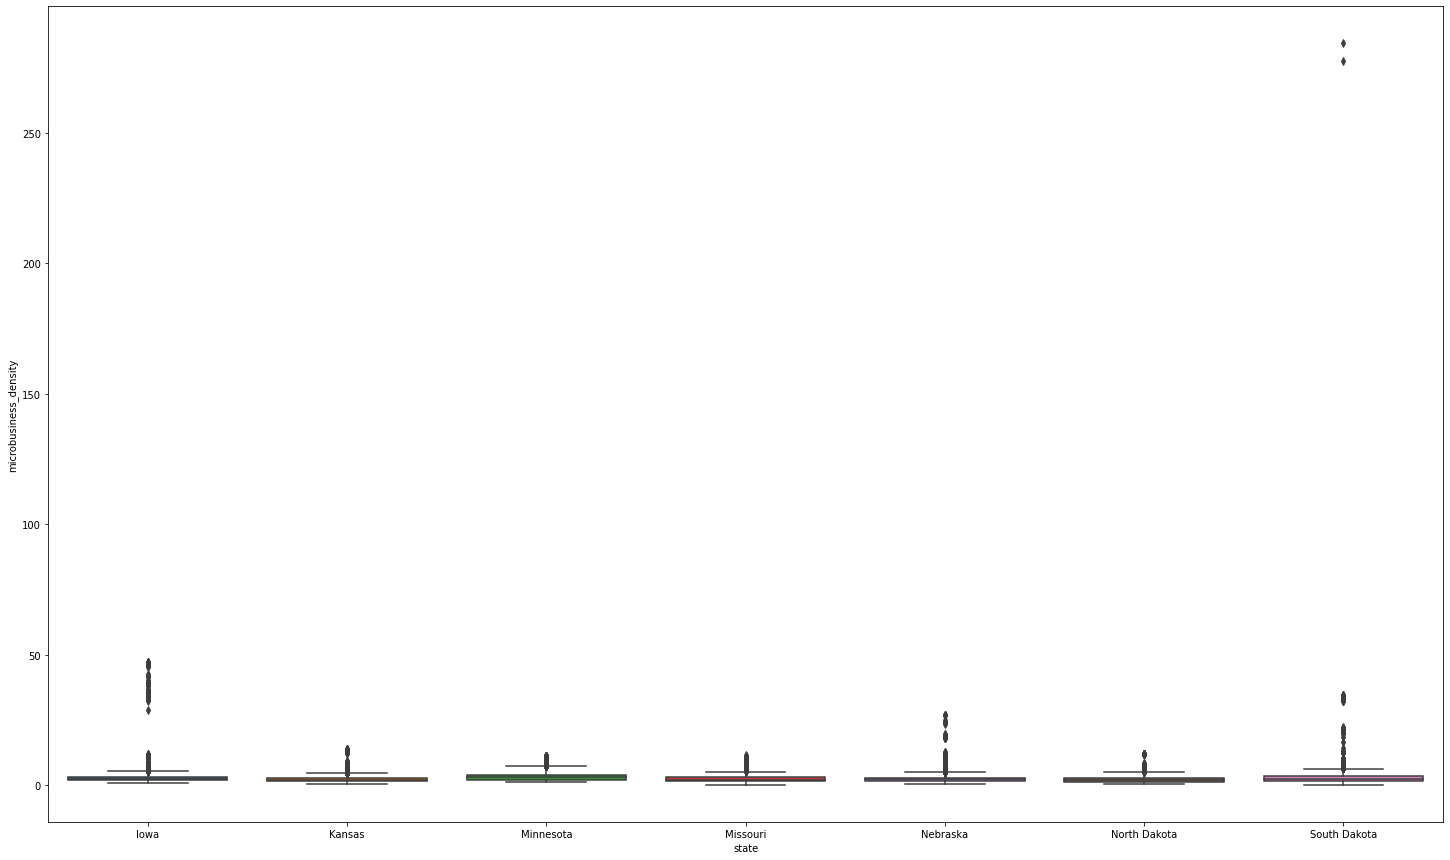

In [29]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="microbusiness_density")
plt.show()

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

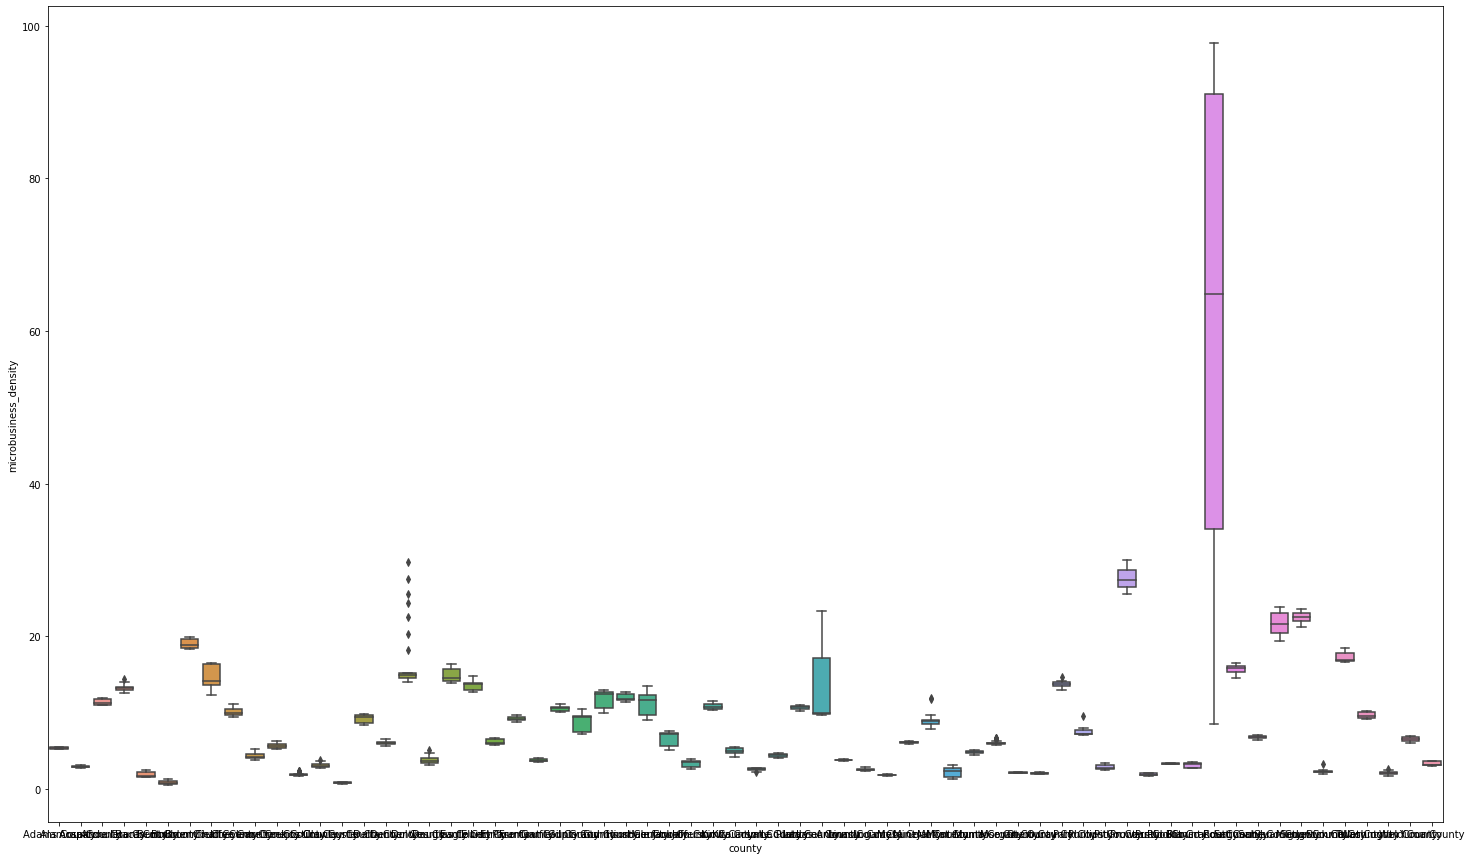

In [30]:
#take a look at county
plt.figure(figsize=(25,15))
selected_state = 'Colorado'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

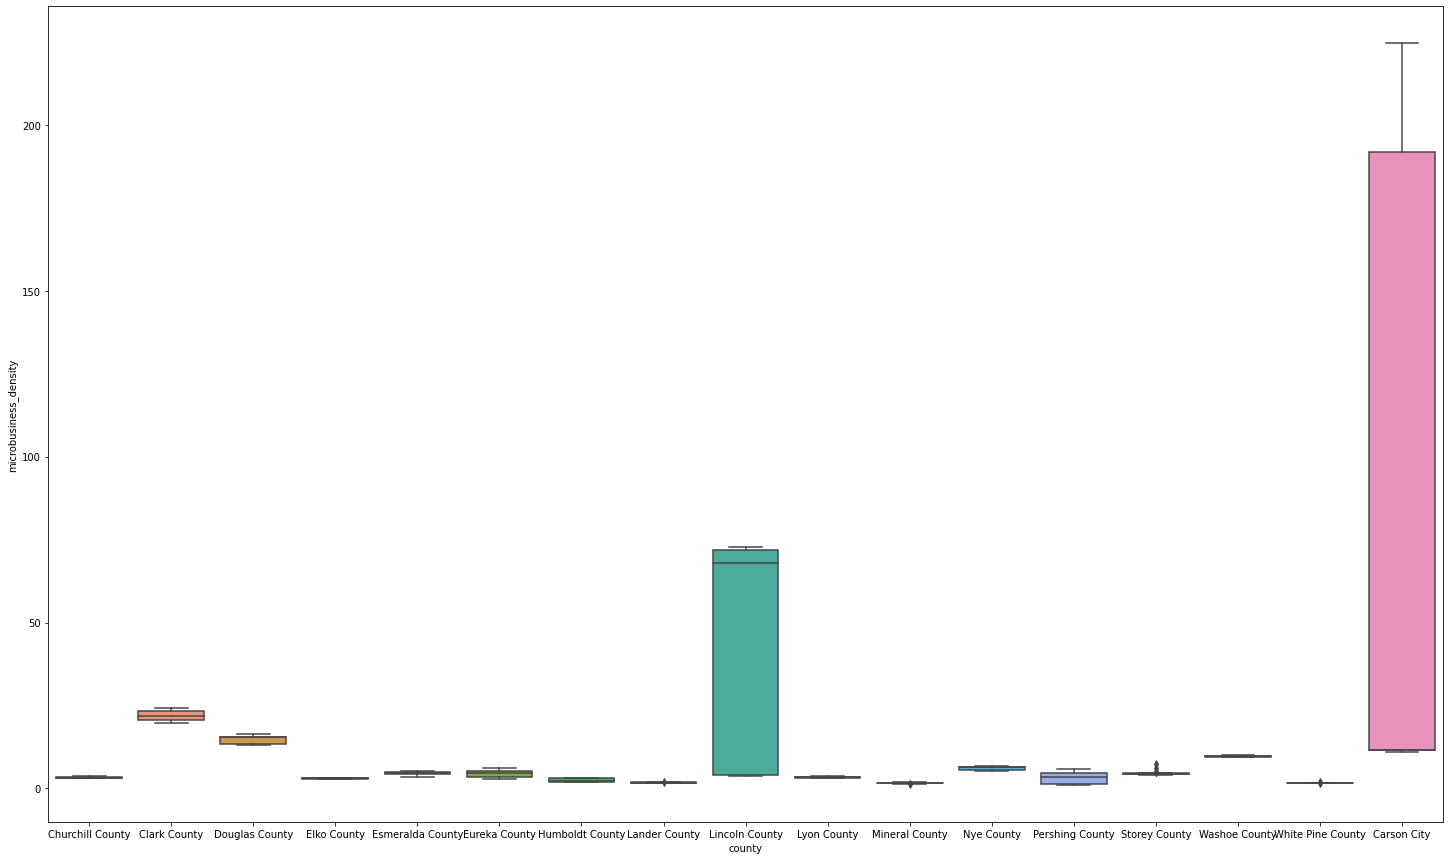

In [31]:
plt.figure(figsize=(25,15))
selected_state = 'Nevada'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

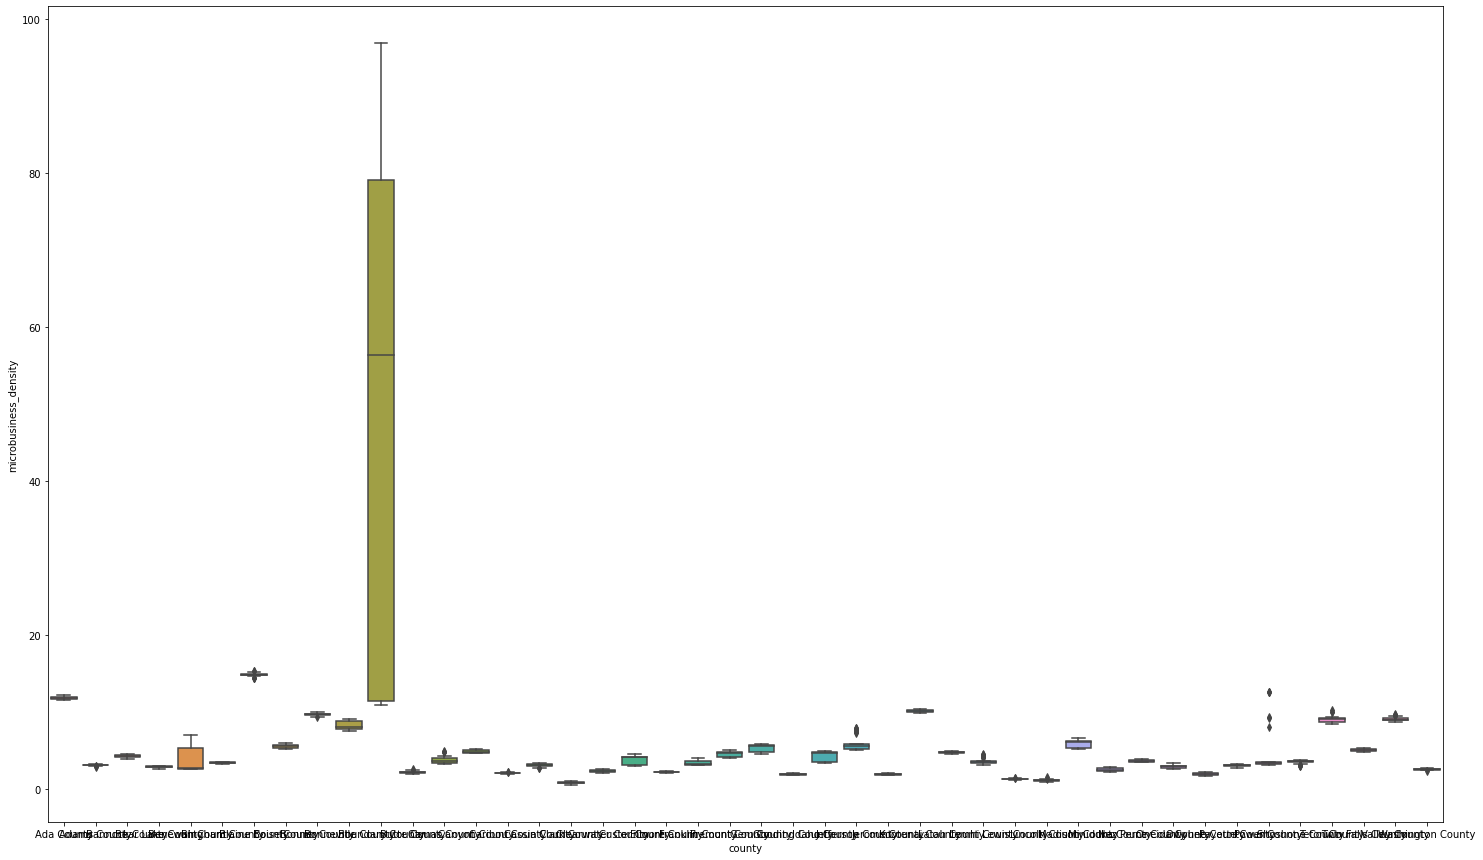

In [32]:
plt.figure(figsize=(25,15))
selected_state = 'Idaho'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

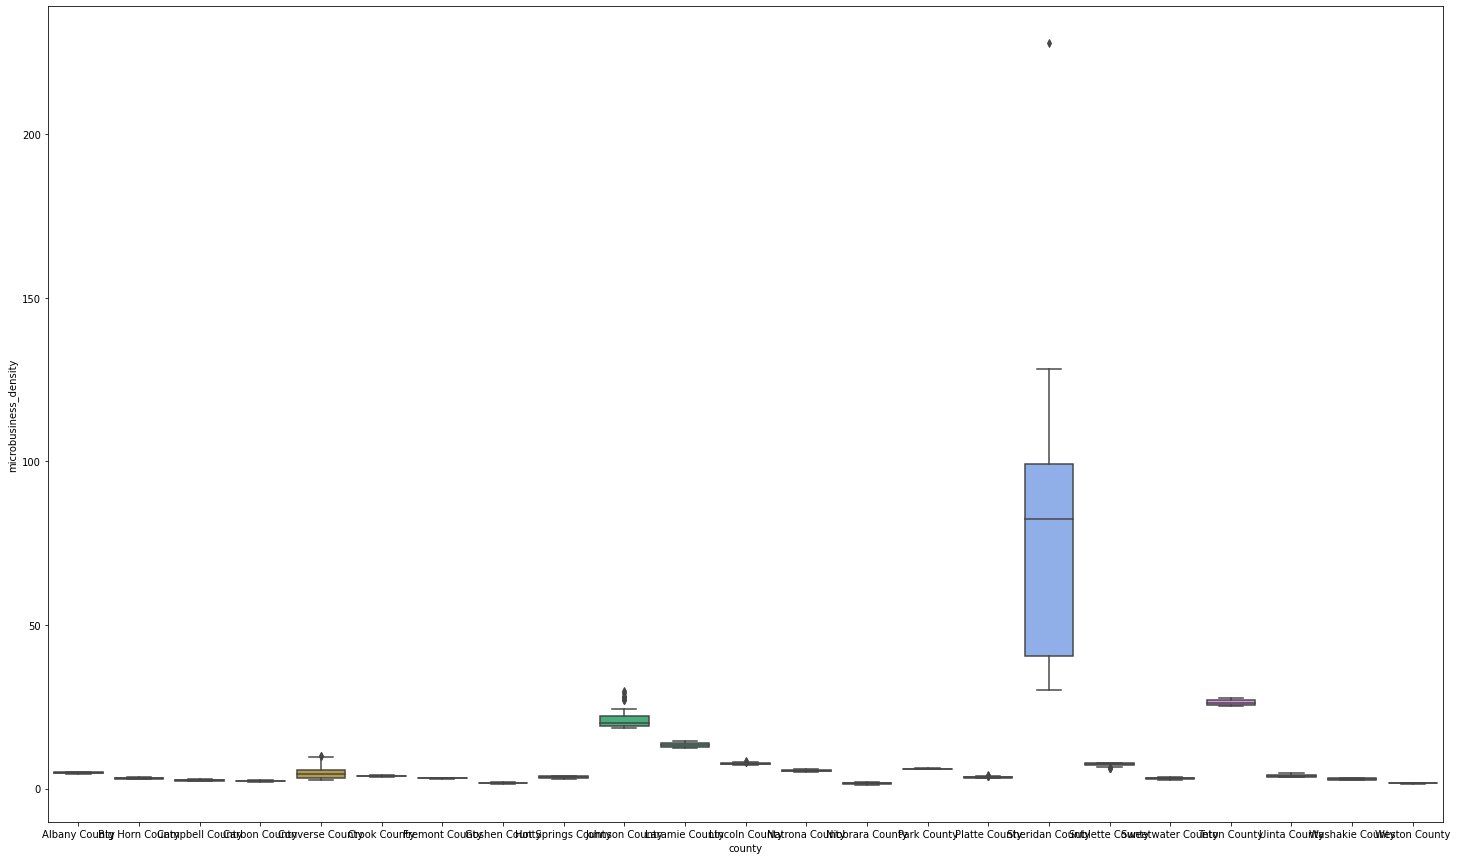

In [33]:
plt.figure(figsize=(25,15))
selected_state = 'Wyoming'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

In [34]:
state_df[df['microbusiness_density'] > 200]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_foreign_born,...,annual_tax_rate,quarter,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile,region
37583,56033_2022-10-01,56033,Sheridan County,Wyoming,2022-10-01,227.75665,54509,2022,10,2.2,...,0.0,Q4,0,0,1,0,1,0,0,Mountain/Pacific


<AxesSubplot:xlabel='county', ylabel='microbusiness_density'>

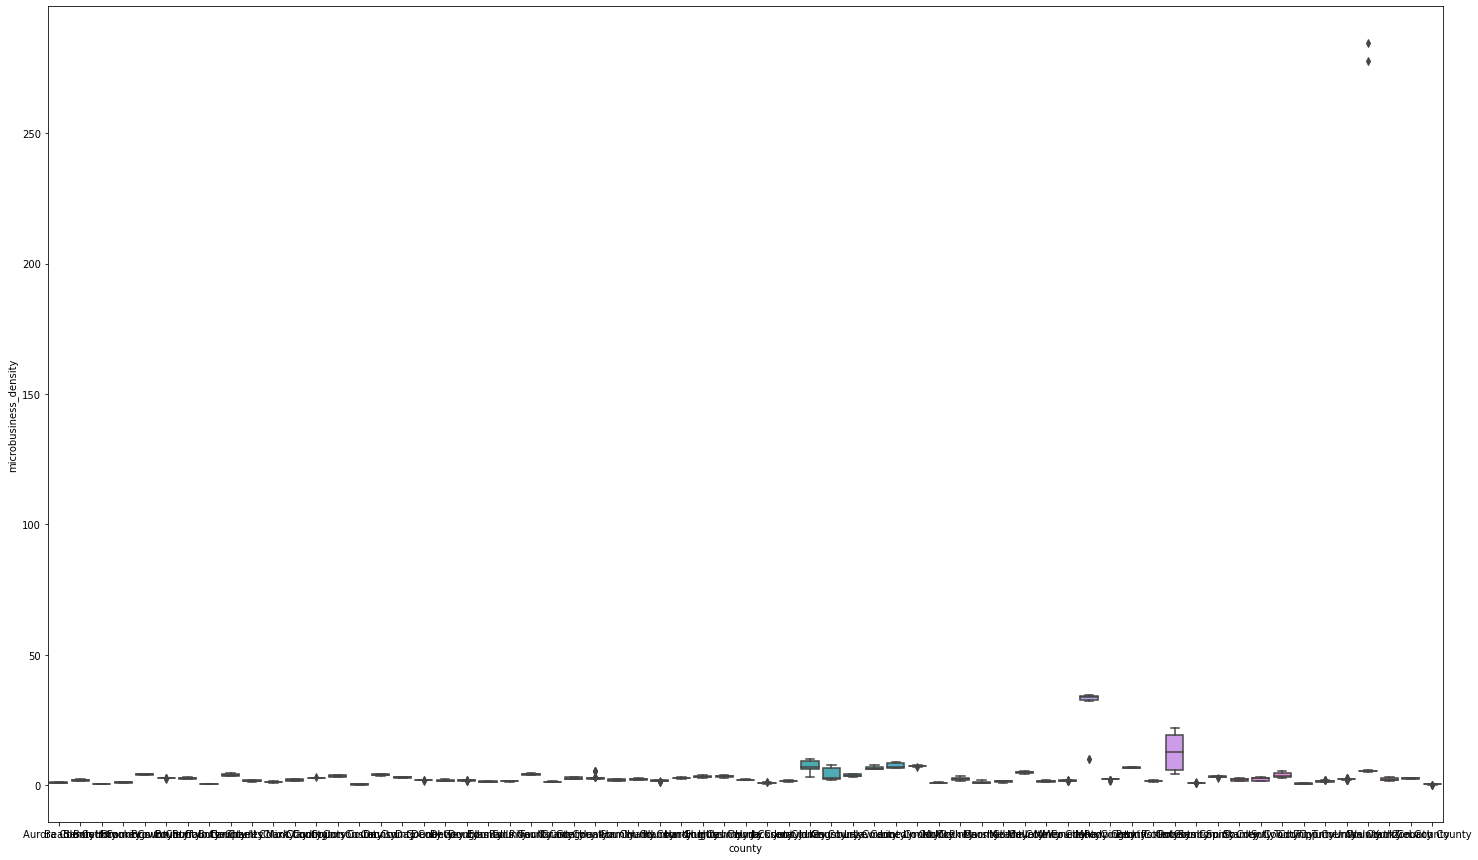

In [35]:
plt.figure(figsize=(25,15))
selected_state = 'South Dakota'
state_df = df[df['state'] == selected_state]
sns.boxplot(data=state_df, x="county", y="microbusiness_density")

In [36]:
state_df[df['microbusiness_density'] > 250]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_foreign_born,...,annual_tax_rate,quarter,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile,region
9676,46127_2019-08-01,46127,Union County,South Dakota,2019-08-01,277.53598,31245,2019,8,3.3,...,0.0,Q3,0,1,0,0,1,0,0,West North Central
34748,46127_2019-10-01,46127,Union County,South Dakota,2019-10-01,284.34003,32011,2019,10,3.3,...,0.0,Q4,0,1,0,0,1,0,0,West North Central


<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

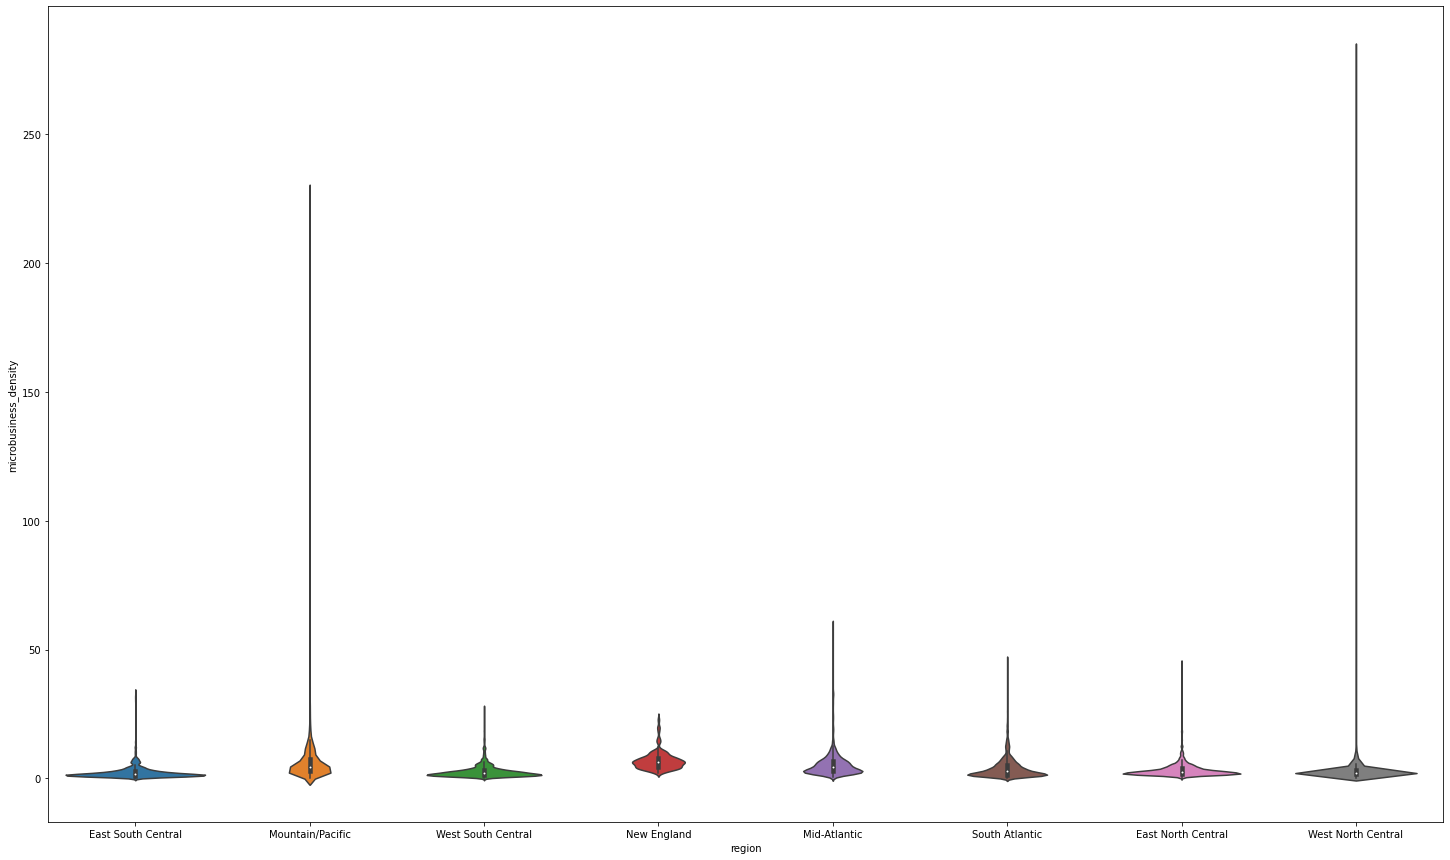

In [37]:
#violin plot
plt.figure(figsize=(25,15))
sns.violinplot(data=df, x="region", y="microbusiness_density")

<AxesSubplot:xlabel='region', ylabel='microbusiness_density'>

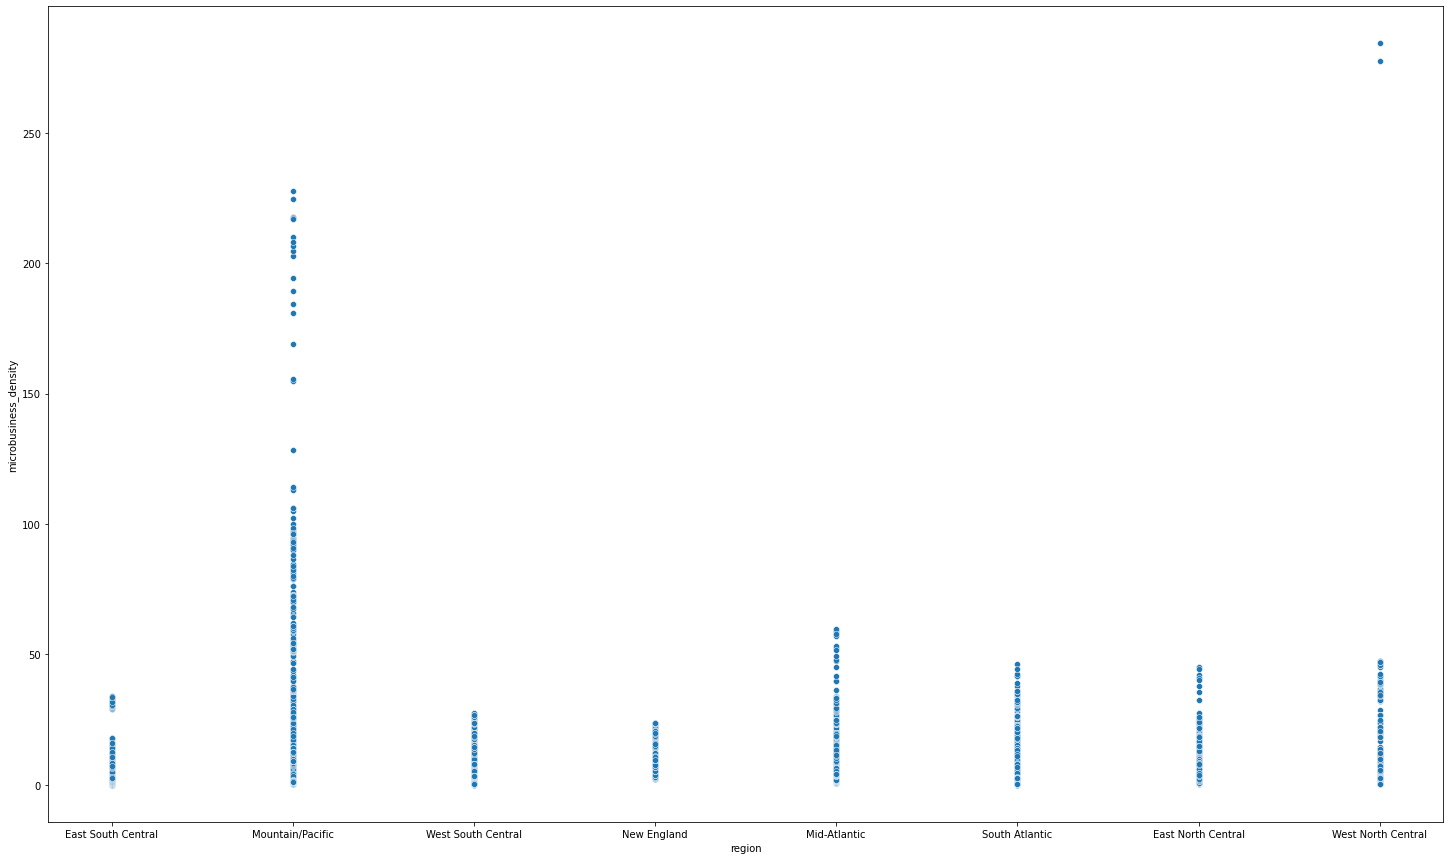

In [38]:
# scatter plot, looks just like box plot and worse than box plot here
plt.figure(figsize=(25,15))
sns.scatterplot(data=df, x="region", y="microbusiness_density")

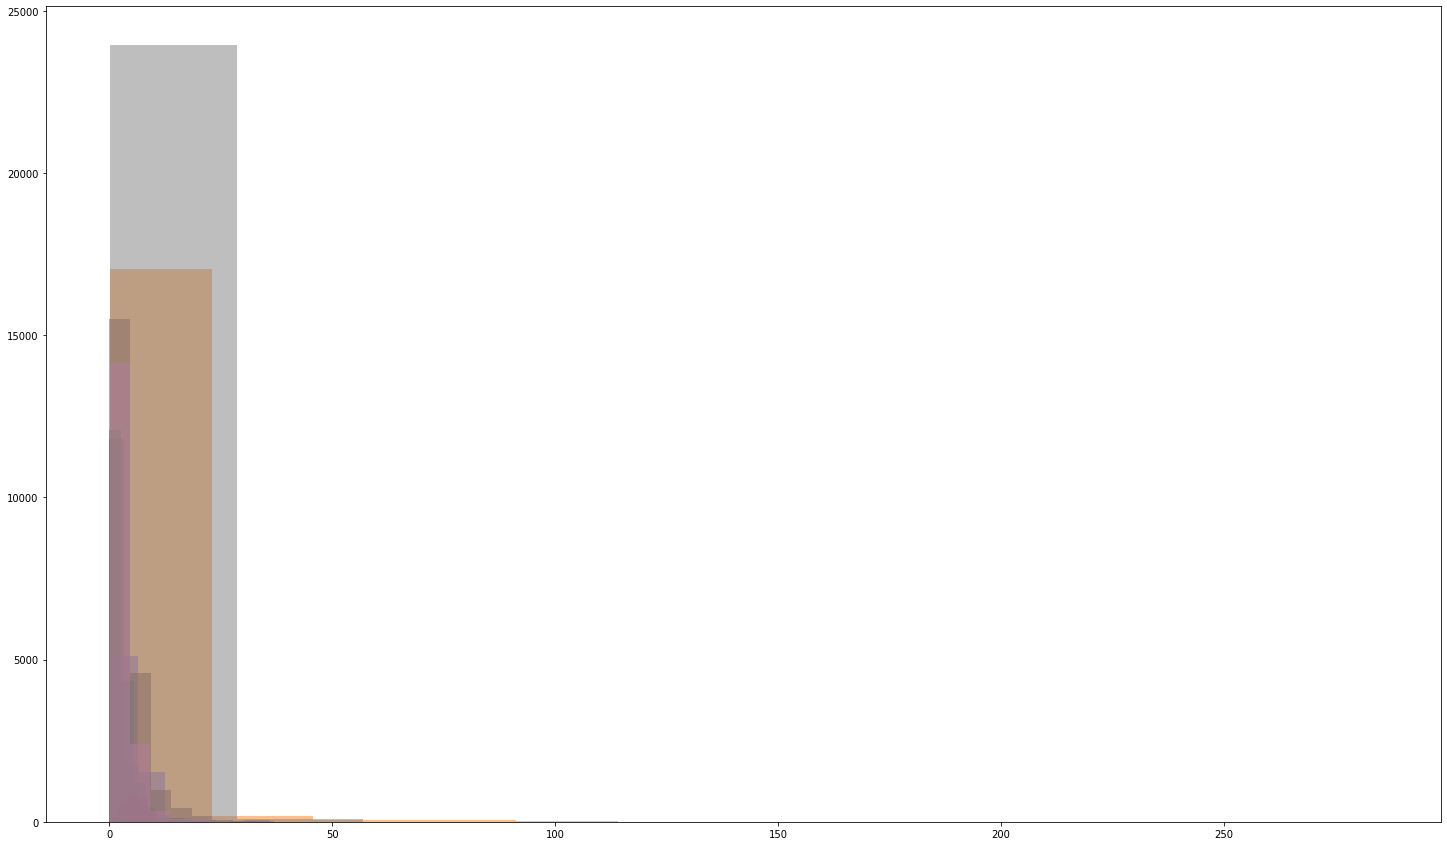

In [39]:
# histogram plot
plt.figure(figsize=(25,15))
regions = df['region'].unique()
for region in regions:
    data = df[df['region'] == region]['microbusiness_density']
    plt.hist(data, alpha=0.5, label=region)


# Regional x income bracket

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   row_id                                 122265 non-null  object 
 1   cfips                                  122265 non-null  int64  
 2   county                                 122265 non-null  object 
 3   state                                  122265 non-null  object 
 4   first_day_of_month                     122265 non-null  object 
 5   microbusiness_density                  122265 non-null  float64
 6   active                                 122265 non-null  int64  
 7   year                                   122265 non-null  int64  
 8   month                                  122265 non-null  int64  
 9   pct_foreign_born                       122265 non-null  float64
 10  pct_bb                                 122265 non-null  

<AxesSubplot:xlabel='region', ylabel='median_hh_inc'>

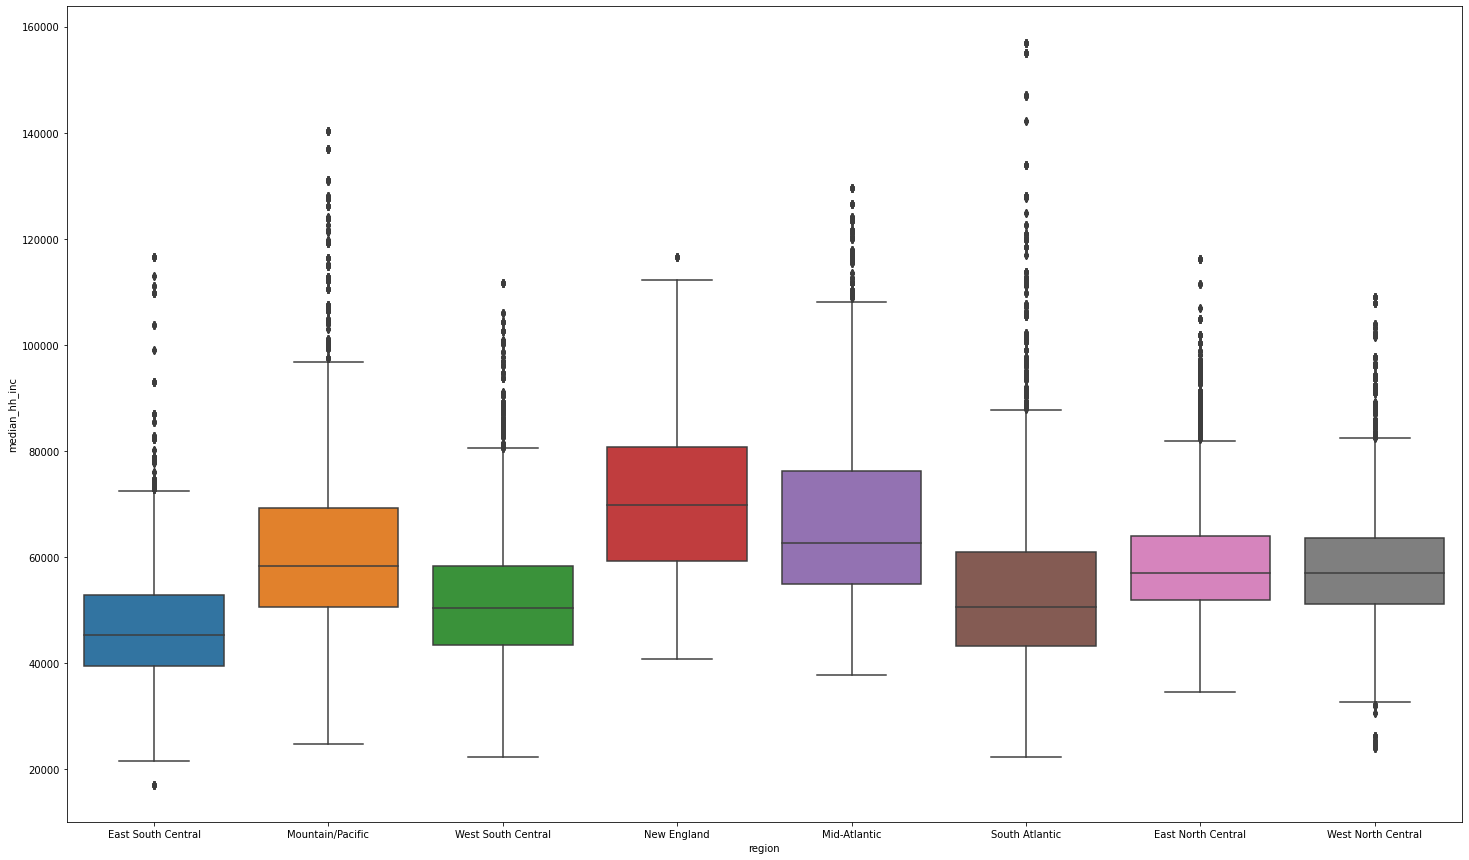

In [41]:
#box plot
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="median_hh_inc")

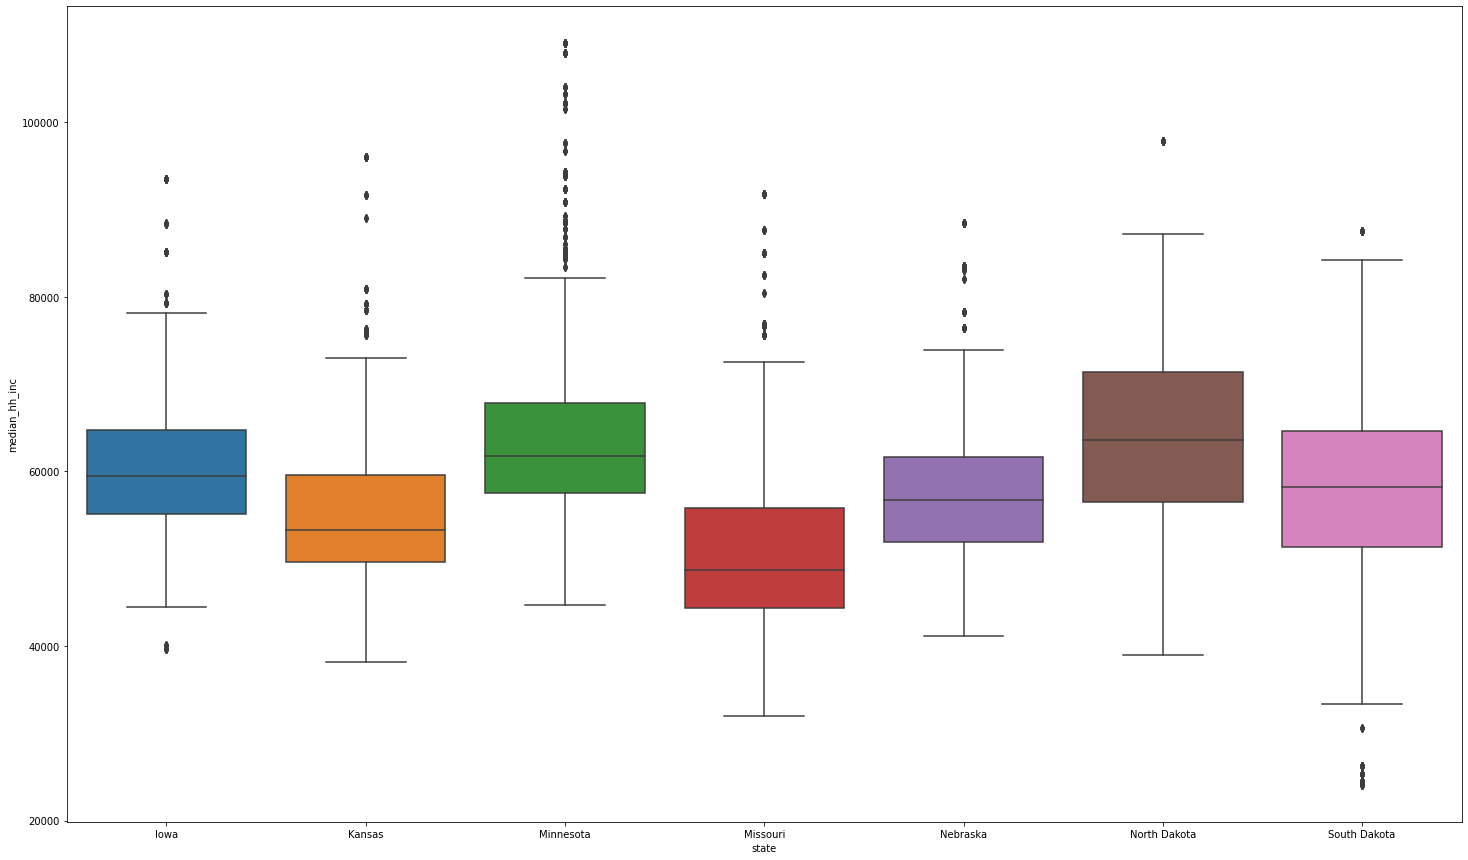

In [42]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

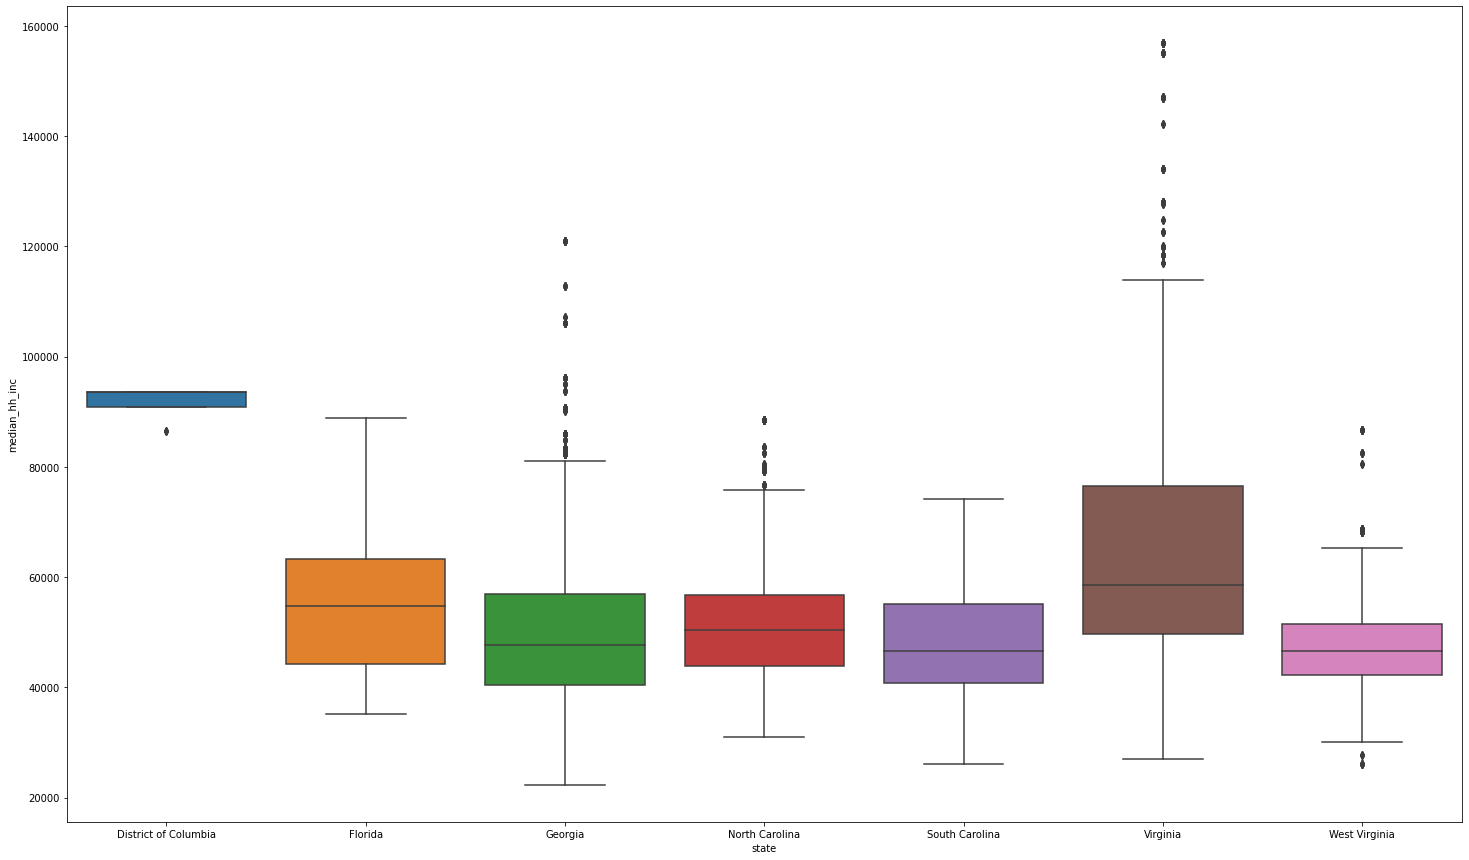

In [43]:
selected_region = 'South Atlantic'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

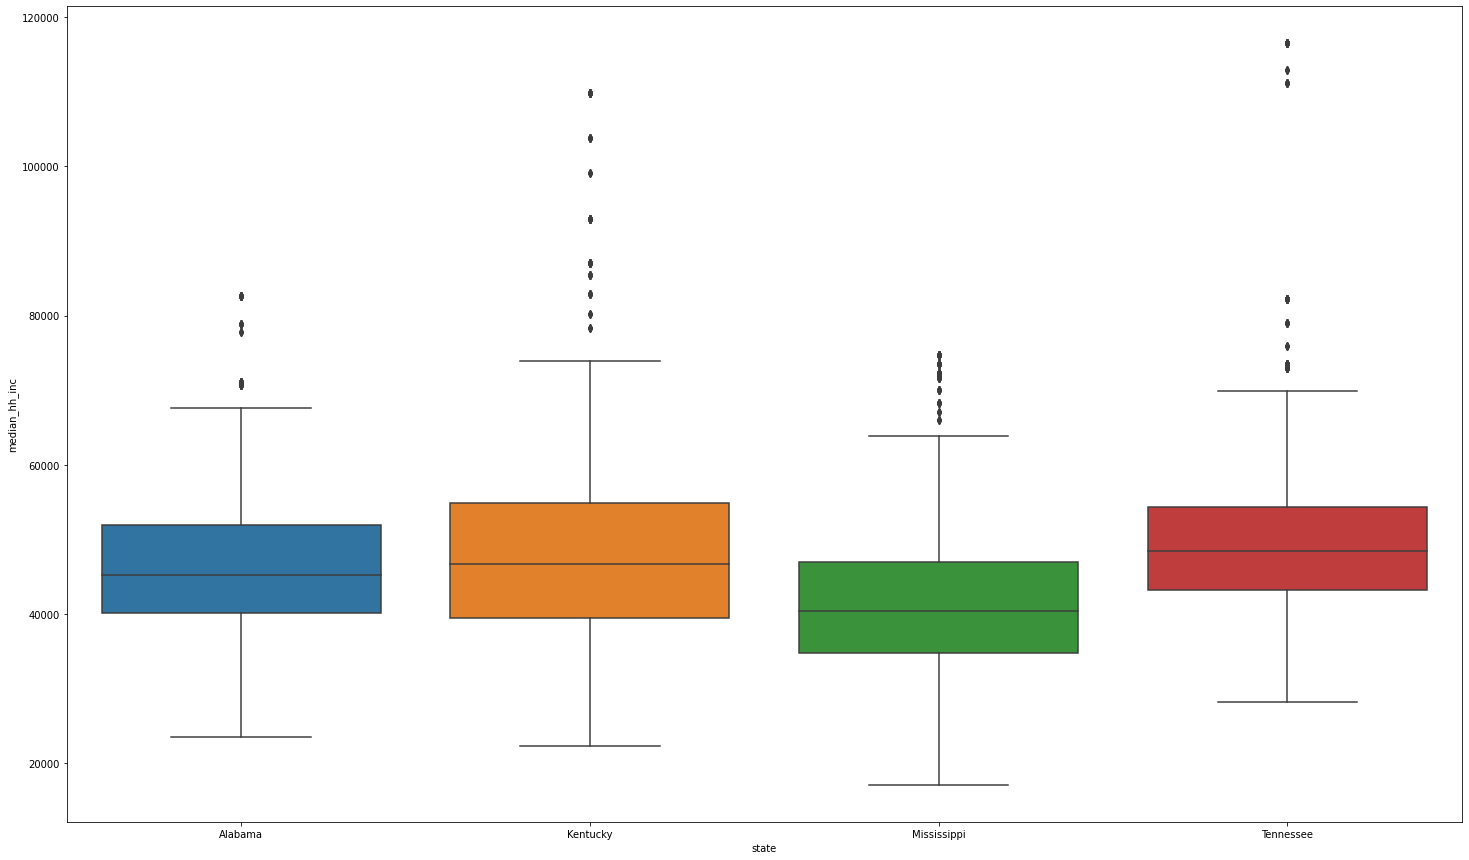

In [44]:
selected_region = 'East South Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="median_hh_inc")
plt.show()

<AxesSubplot:xlabel='region', ylabel='median_hh_inc'>

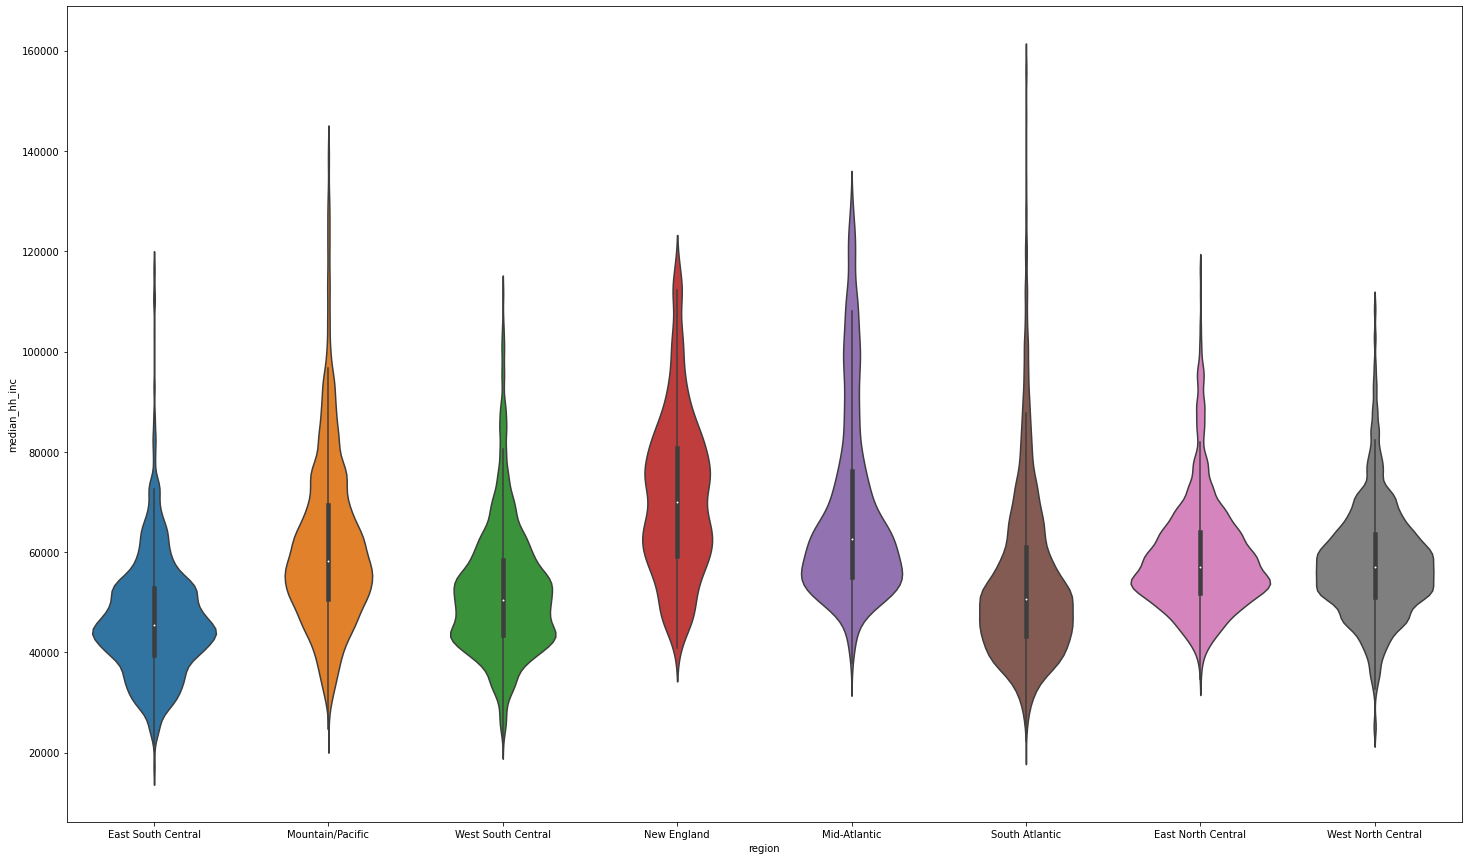

In [45]:
#violin plot
plt.figure(figsize=(25,15))
sns.violinplot(data=df, x="region", y="median_hh_inc")

# region x earning

<AxesSubplot:xlabel='region', ylabel='earning'>

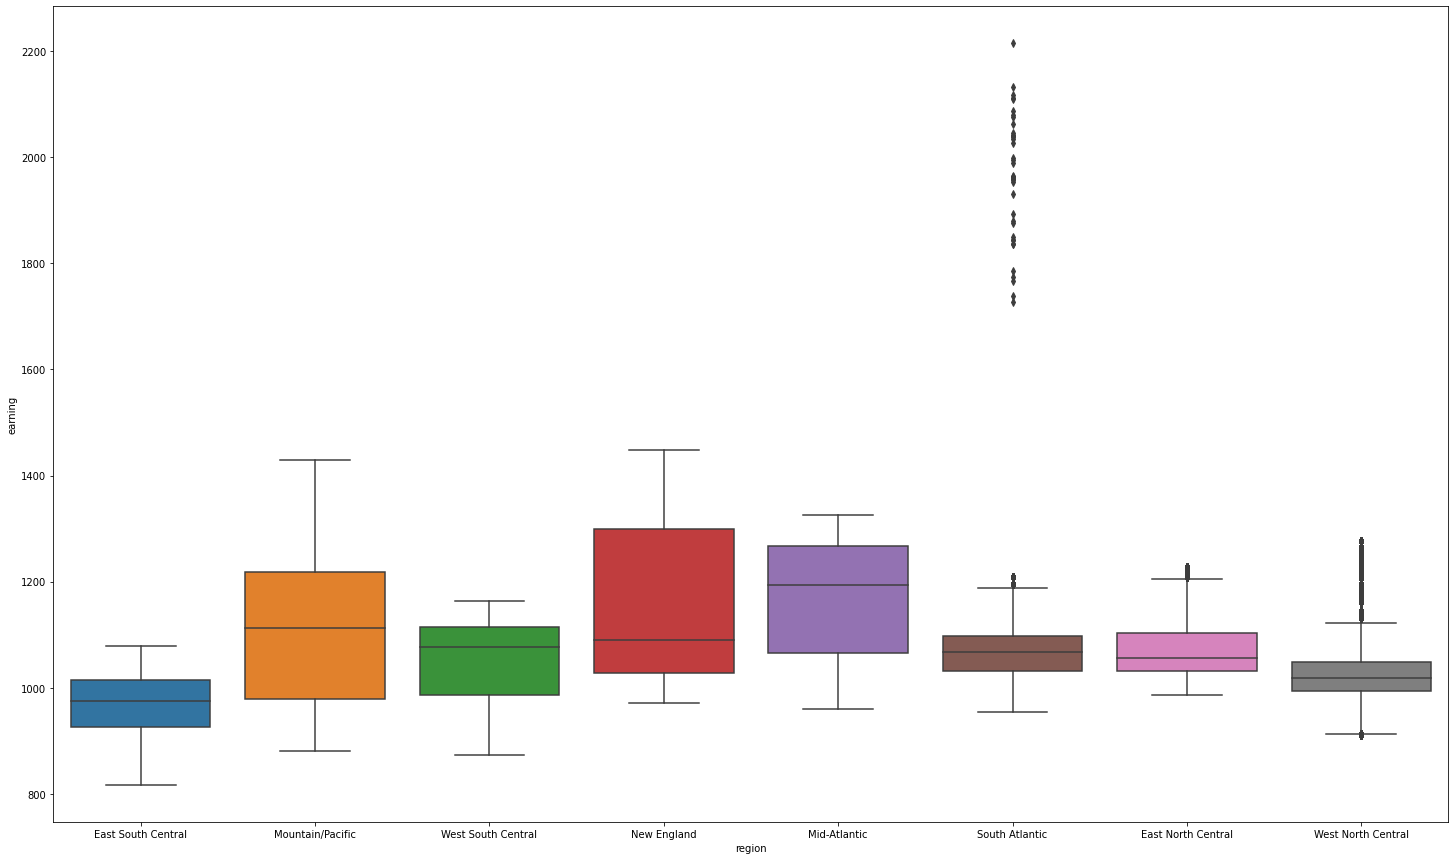

In [46]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df, x="region", y="earning")

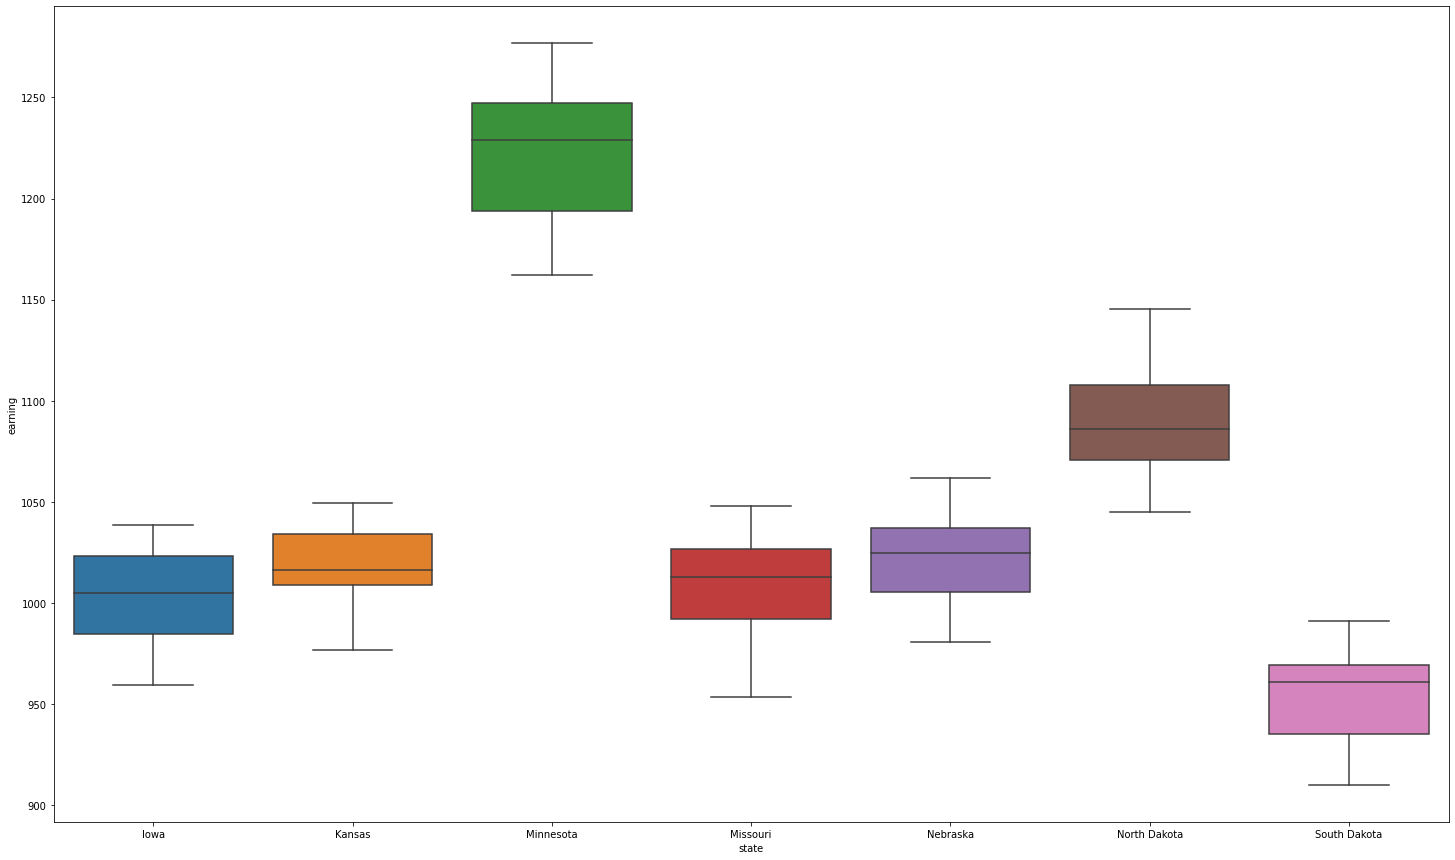

In [47]:
selected_region = 'West North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

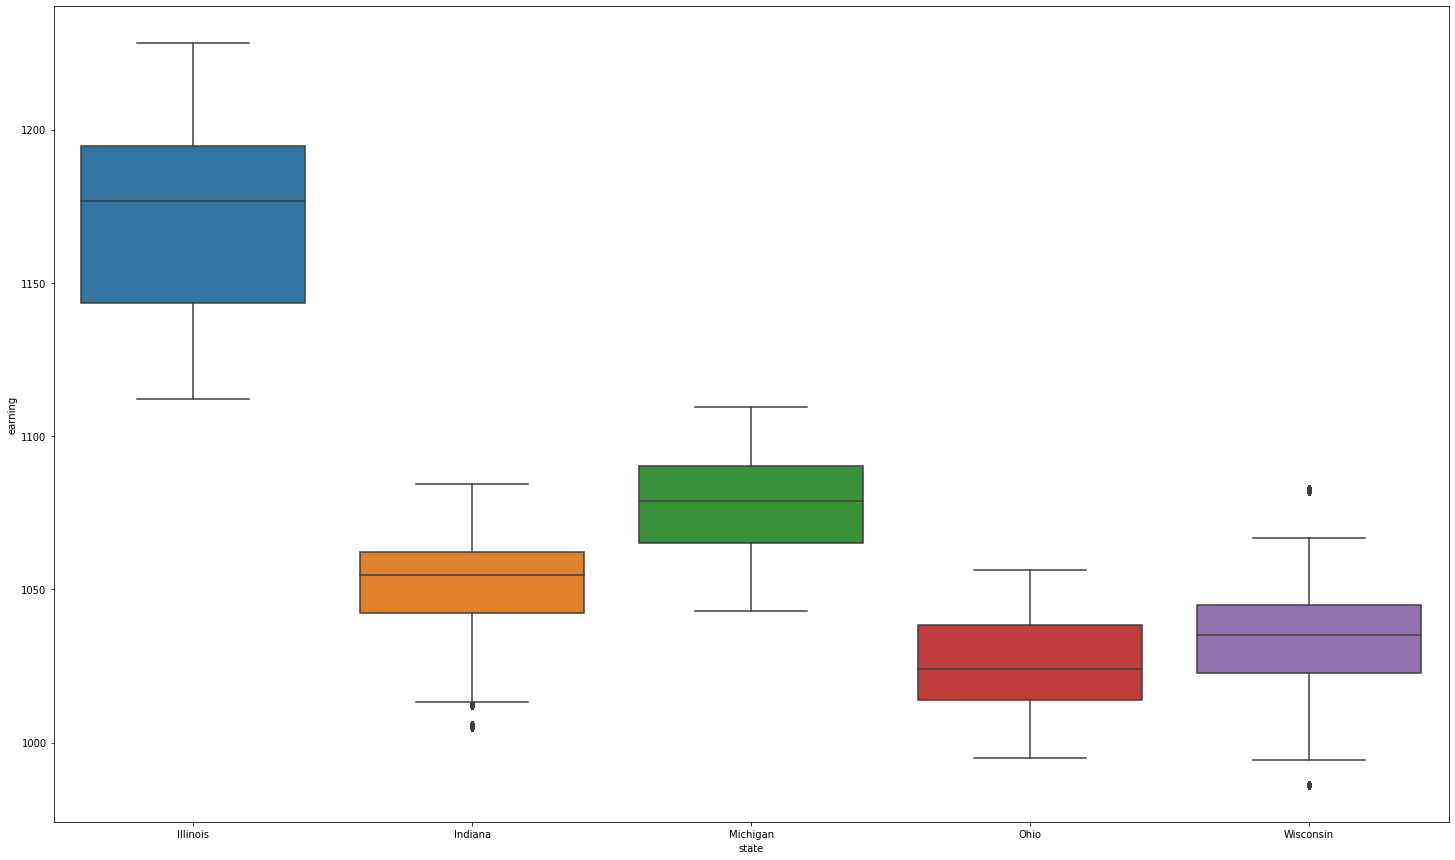

In [48]:
selected_region = 'East North Central'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

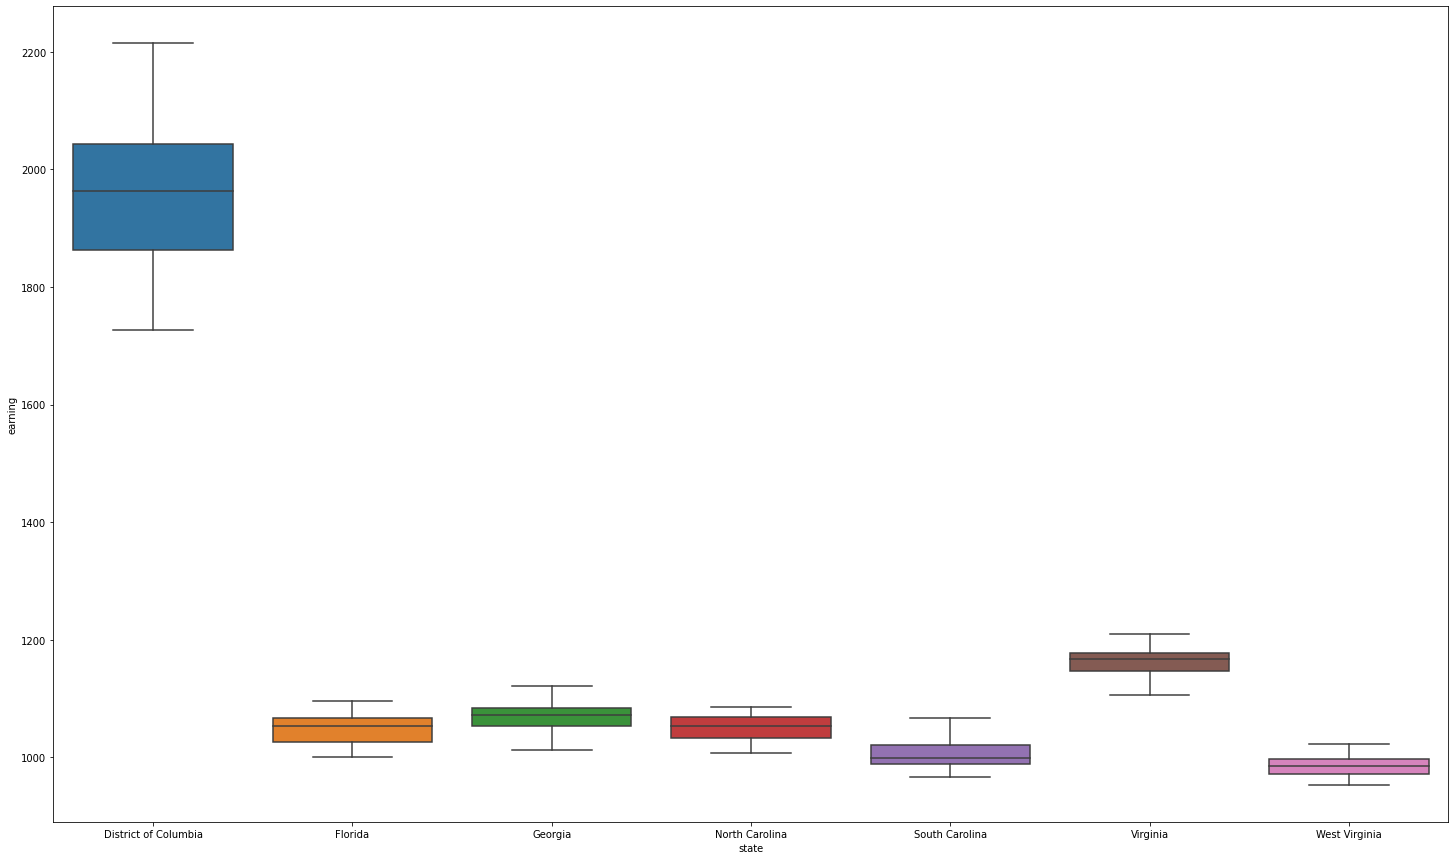

In [49]:
selected_region = 'South Atlantic'
region_df = df[df['state'].isin([state for state, region in region_map.items() if region == selected_region])]
plt.figure(figsize=(25,15))
sns.boxplot(data=region_df, x="state", y="earning")
plt.show()

In [50]:
df.head(3)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_foreign_born,...,annual_tax_rate,quarter,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile,region
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,2.3,...,6.03,Q3,0,1,0,0,0,1,0,East South Central
1,1001_2020-08-01,1001,Autauga County,Alabama,2020-08-01,3.174679,1328,2020,8,2.3,...,6.07,Q3,0,0,1,0,0,1,0,East South Central
2,1001_2021-08-01,1001,Autauga County,Alabama,2021-08-01,3.219917,1358,2021,8,2.1,...,6.05,Q3,0,0,1,0,0,1,0,East South Central


In [51]:
df[df['region'].isnull()]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_foreign_born,...,annual_tax_rate,quarter,holiday_season,earning_group_lower_25_percentile,earning_group_middle_50_percentile,earning_group_upper_75_percentile,annual_tax_group_lower_25_percentile,annual_tax_group_middle_50_percentile,annual_tax_group_upper_75_percentile,region


In [52]:
df.to_csv(path_gdrive + 'train_imputed.csv', index=False)